**Tensor and Gradients**

In [1]:
import torch

# Create two random 3x3 tensors, setting requires_grad=True to calculate gradients
tensor1 = torch.rand(3, 3, requires_grad=True)
tensor2 = torch.rand(3, 3, requires_grad=True)

# Define a function: sum of element-wise multiplication
function = (tensor1 * tensor2).sum()

# Calculate gradients
function.backward()

# Display the gradients
print("Gradient of tensor1:\n", tensor1.grad)
print("Gradient of tensor2:\n", tensor2.grad)


Gradient of tensor1:
 tensor([[0.7157, 0.4190, 0.3593],
        [0.7003, 0.8617, 0.0977],
        [0.6897, 0.6822, 0.2400]])
Gradient of tensor2:
 tensor([[0.7934, 0.4578, 0.4156],
        [0.4024, 0.7170, 0.0493],
        [0.7248, 0.4946, 0.9852]])


**Model Building**

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the modified neural network with more hidden layers
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 8, bias=False)
        self.fc2 = nn.Linear(8, 16)   # New hidden layer
        self.fc3 = nn.Linear(16, 32)  # New hidden layer
        self.fc4 = nn.Linear(32, 16)  # New hidden layer
        self.fc5 = nn.Linear(16, 8)   # New hidden layer
        self.fc6 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Activation after new layer
        x = torch.relu(self.fc3(x))  # Activation after new layer
        x = torch.relu(self.fc4(x))  # Activation after new layer
        x = torch.relu(self.fc5(x))  # Activation after new layer
        x = self.fc6(x)
        return x

# Create an instance of the modified network
net = SimpleNet()
print(net)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Prepare some dummy data and labels
data = torch.tensor([[1., 2.], [3., 4.]], dtype=torch.float32)
labels = torch.tensor([[0.], [1.]], dtype=torch.float32)

# Train the modified neural network
for epoch in range(500):
    # Forward pass
    outputs = net(data)
    loss = criterion(outputs, labels)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

    # Print the loss for this epoch
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{500}], Loss: {loss.item():.4f}")


SimpleNet(
  (fc1): Linear(in_features=2, out_features=8, bias=False)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=8, bias=True)
  (fc6): Linear(in_features=8, out_features=1, bias=True)
)
Epoch [100/500], Loss: 0.2121
Epoch [200/500], Loss: 0.1774
Epoch [300/500], Loss: 0.1245
Epoch [400/500], Loss: 0.0631
Epoch [500/500], Loss: 0.0212


**Data Augmentation**

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


# Define additional data transformations
transform = transforms.Compose([
    transforms.RandomRotation(10), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset with the new transformations
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=512, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=512, shuffle=False, num_workers=2
)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))

# List of class labels
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


Num training examples: 60000
Num test examples: 10000


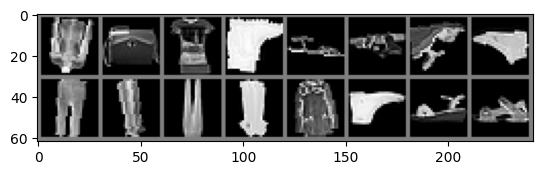

Shirt -- Bag -- T-shirt/top -- Ankle boot -- Sandal -- Sandal -- Sandal -- Sneaker
Trouser -- Dress -- Trouser -- Dress -- Coat -- Ankle boot -- Sandal -- Sandal


In [10]:
# Function to display an image grid
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:16]))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8)))
print(" -- ".join(f"{classes[labels[j]]}" for j in range(8, 16)))


In [11]:
# Define the neural network for FashionMNIST
class FashionMNISTNet(nn.Module):
    def __init__(self):
        super(FashionMNISTNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3)  # Output: (16, 26, 26) after Conv2d
        self.pool = nn.MaxPool2d(2, 2)     # Output: (16, 13, 13) after MaxPool
        self.conv2 = nn.Conv2d(16, 32, 3)  # Output: (32, 11, 11) after Conv2d
        self.fc1 = nn.Linear(32 * 5 * 5, 128)  # Update in_features based on new size
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # After conv1: (batch, 16, 26, 26)
        x = self.pool(F.relu(self.conv2(x)))  # After conv2: (batch, 32, 11, 11)
        x = x.view(-1, 32 * 5 * 5)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# IMPORTANT CODE BELOW
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create an instance of the neural network
net = FashionMNISTNet()
print(net)

# Move the model to the GPU if available
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Train the neural network using the FashionMNIST dataset
num_epochs = 20
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / (i + 1)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Training finished.")


Using device: cuda
FashionMNISTNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
Epoch [1/20], Loss: 1.8072
Epoch [2/20], Loss: 0.8369
Epoch [3/20], Loss: 0.6875
Epoch [4/20], Loss: 0.6330
Epoch [5/20], Loss: 0.5931
Epoch [6/20], Loss: 0.5664
Epoch [7/20], Loss: 0.5379
Epoch [8/20], Loss: 0.5099
Epoch [9/20], Loss: 0.4991
Epoch [10/20], Loss: 0.4797
Epoch [11/20], Loss: 0.4701
Epoch [12/20], Loss: 0.4545
Epoch [13/20], Loss: 0.4384
Epoch [14/20], Loss: 0.4298
Epoch [15/20], Loss: 0.4147
Epoch [16/20], Loss: 0.4108
Epoch [17/20], Loss: 0.4001
Epoch [18/20], Loss: 0.3956
Epoch [19/20], Loss: 0.3883
Epoch [20/20], Loss: 0.3818
Training finished.


In [12]:
# Test the neural network
correct = 0
total = 0

# Set the model to evaluation mode
net.eval()

# Disable gradient calculation
with torch.no_grad():
    for inputs, labels in test_loader:

        # Move the inputs and labels to the GPU if available
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = net(inputs)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total number of samples and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.21%


**Transfer Learning**

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchvision.models import ResNet18_Weights

# Define transformations for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 as expected by ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load a subset of CIFAR-10 dataset 
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for train and test datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("Num training examples: {}".format(len(train_dataset)))
print("Num test examples: {}".format(len(test_dataset)))
print("Classes in CIFAR-10:", train_dataset.classes)

100%|██████████| 170498071/170498071 [00:02<00:00, 81073796.01it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Num training examples: 50000
Num test examples: 10000
Classes in CIFAR-10: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


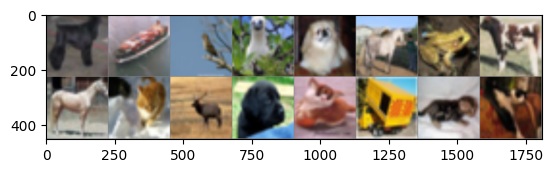

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [26]:
# Function to display an image grid
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:16]))

print(train_dataset.classes)

In [27]:
# Load the pre-trained ResNet18 model
net = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

# Freeze all layers except the last fully connected layer
for param in net.parameters():
    param.requires_grad = False

# Modify the final layer to output 10 classes (for CIFAR-10 or MNIST)
num_classes = 10
net.fc = nn.Linear(net.fc.in_features, num_classes)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and optimizer (only parameters of the final layer are being optimized)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.fc.parameters(), lr=0.001, momentum=0.9)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")
print("Fine-tuning finished.")

Epoch [1/5], Loss: 0.8663
Epoch [2/5], Loss: 0.6567
Epoch [3/5], Loss: 0.6217
Epoch [4/5], Loss: 0.6088
Epoch [5/5], Loss: 0.5969
Fine-tuning finished.


In [28]:
# Test the model
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.97%


**Parameter Tuning**

In [5]:
import torch
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet18_Weights
import torch.nn as nn

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define a list of optimizers and learning rates to try
learning_rates = [0.01, 0.1]
optimizers = ["Adam", "RMSprop"]

# Function to initialize the model, criterion, and optimizer
def get_model_optimizer(optimizer_name, learning_rate):
    # Load ResNet18 with pre-trained weights
    model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
    
    # Freeze all layers except the last fully connected layer
    for param in model.parameters():
        param.requires_grad = False
    
    # Modify the last layer to match the number of classes
    num_classes = 10  # For CIFAR-10 or similar
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model.to(device)

    # Define the loss function
    criterion = nn.CrossEntropyLoss()

    # Choose the optimizer based on the input string
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = optim.RMSprop(model.fc.parameters(), lr=learning_rate)
    else:
        raise ValueError("Unsupported optimizer name")

    return model, criterion, optimizer

# Training and evaluation loop to test different configurations
def train_and_evaluate(optimizer_name, learning_rate, num_epochs=5):
    model, criterion, optimizer = get_model_optimizer(optimizer_name, learning_rate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)
        print(f"{optimizer_name} (lr={learning_rate}) Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Test the model
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"{optimizer_name} (lr={learning_rate}) Accuracy: {accuracy:.2f}%\n")

# Experiment with different learning rates and optimizers
for optimizer_name in optimizers:
    for lr in learning_rates:
        train_and_evaluate(optimizer_name, lr)


Adam (lr=0.01) Epoch [1/5], Loss: 1.0654
Adam (lr=0.01) Epoch [2/5], Loss: 1.0239
Adam (lr=0.01) Epoch [3/5], Loss: 1.0886
Adam (lr=0.01) Epoch [4/5], Loss: 1.0920
Adam (lr=0.01) Epoch [5/5], Loss: 1.1049
Adam (lr=0.01) Accuracy: 77.59%

Adam (lr=0.1) Epoch [1/5], Loss: 7.3816
Adam (lr=0.1) Epoch [2/5], Loss: 8.8795
Adam (lr=0.1) Epoch [3/5], Loss: 9.0472
Adam (lr=0.1) Epoch [4/5], Loss: 9.6623
Adam (lr=0.1) Epoch [5/5], Loss: 9.6369
Adam (lr=0.1) Accuracy: 75.07%

RMSprop (lr=0.01) Epoch [1/5], Loss: 1.8493
RMSprop (lr=0.01) Epoch [2/5], Loss: 1.5458
RMSprop (lr=0.01) Epoch [3/5], Loss: 1.5391
RMSprop (lr=0.01) Epoch [4/5], Loss: 1.5317
RMSprop (lr=0.01) Epoch [5/5], Loss: 1.5276
RMSprop (lr=0.01) Accuracy: 74.02%

RMSprop (lr=0.1) Epoch [1/5], Loss: 17.7368
RMSprop (lr=0.1) Epoch [2/5], Loss: 14.5226
RMSprop (lr=0.1) Epoch [3/5], Loss: 14.5839
RMSprop (lr=0.1) Epoch [4/5], Loss: 14.4509
RMSprop (lr=0.1) Epoch [5/5], Loss: 14.4151
RMSprop (lr=0.1) Accuracy: 69.16%

